In [1]:
import spacy
import pandas as pd
import en_core_web_sm
from gensim.parsing.preprocessing import remove_stopwords
from GoogleNews import GoogleNews
from newspaper import Article
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

nlp=spacy.load("en_core_web_sm")
gnews= GoogleNews(period='Id')

In [2]:
from datetime import date
today = date.today()
ed=today.strftime("%Y-%m-%d")
dif=str(today.year-2)
sd=ed.replace(ed[:4], dif)

In [3]:
def listToString(s):
   
    str1 = " "
    return (str1.join(s))

def read_text_file(file_path):
    with open(file_path, 'r') as f:
        f=(f.read())
        stop_words.append(f)

In [4]:
data=[]

In [5]:
import os
path = r"D:\df\black\StopWords"
os.chdir(path)
stop_words=[]


for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        read_text_file(file_path)

stop = []

result_1 = [item.split('\n') for item in stop_words]
result_2 = [item for l in result_1 for item in l]

result_3 = [item.split('|') for item in result_2]
result_4= [item for l in result_3 for item in l]

result_5 = [item.split(' ') for item in result_4]
result_6= [item for l in result_5 for item in l]

result_7=[item.split(" '' ") for item in result_6]
result_8= [item for l in result_7 for item in l]

for ele in result_8:
    if ele.strip():
        stop.append(ele)

In [6]:
cmp=input()
gnews.search(cmp)
result= gnews.result()
news= pd.DataFrame.from_dict(result)
for i in range(len(news.desc)):
    data.append(news.desc[i])
for i in range(len(news.title)):
    data.append(news.title[i])
article=[]
flag=0
for i in news.index:
        article.append(Article(news['link'][i]))
        try:
            article[i].download()
        except ArticleException:
            pass
        
for i in range(len(article)):
    data.append(article[i].text)
while("" in data):
    data.remove("")

adani power


In [7]:
cmp=cmp.replace(" ","")
cmp=cmp+".ns"
df=yf.download(cmp,sd,ed)
df=df[['High']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

x_input=test_data[len(test_data)-100:].reshape(1,-1)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()



[*********************100%***********************]  1 of 1 completed
Epoch 1/100
4/4 [==============================] - 6s 442ms/step - loss: 0.0116 - val_loss: 0.0327
Epoch 2/100
4/4 [==============================] - 0s 106ms/step - loss: 0.0040 - val_loss: 0.1354
Epoch 3/100
4/4 [==============================] - 0s 113ms/step - loss: 0.0016 - val_loss: 0.2157
Epoch 4/100
4/4 [==============================] - 0s 106ms/step - loss: 0.0021 - val_loss: 0.1584
Epoch 5/100
4/4 [==============================] - 0s 103ms/step - loss: 0.0011 - val_loss: 0.1152
Epoch 6/100
4/4 [==============================] - 0s 105ms/step - loss: 0.0013 - val_loss: 0.1481
Epoch 7/100
4/4 [==============================] - 0s 109ms/step - loss: 9.9120e-04 - val_loss: 0.1900
Epoch 8/100
4/4 [==============================] - 0s 111ms/step - loss: 0.0012 - val_loss: 0.1814
Epoch 9/100
4/4 [==============================] - 0s 106ms/step - loss: 9.7615e-04 - val_loss: 0.1535
Epoch 10/100
4/4 [==============

In [22]:
Data=[]
a=listToString(data)
a= remove_stopwords(a)
a=nlp(a)
for token in a:
    Data.append(token.lemma_)
    


In [23]:
for i in stop[:]:
    if i in Data:
        Data.remove(i)

In [24]:
positive=[]
f=open(r"D:\df\black\MasterDictionary\positive-words.txt")
f=(f.read())

f=f.strip().replace('\n', ' ')

for stra in f.split():
    positive.append(stra)

negative=[]
f=open(r"D:\df\black\MasterDictionary\negative-words.txt")
f=(f.read())

f=f.strip().replace('\n', ' ')

for stra in f.split():
    negative.append(stra)

In [25]:
k=0
m=0
for i in Data:
    for j in positive:
        if i==j:
            k+=1
    for l in negative:
        if i==l:
            m+=1

In [26]:
len(Data)


283

In [13]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):  
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

[0.5418961]
101
1 day input [0.61388013 0.60429025 0.62157726 0.58435328 0.58182962 0.56126181
 0.54700315 0.56138804 0.57779183 0.60921134 0.6020189  0.60100945
 0.60416402 0.57703468 0.58107256 0.58839115 0.57867505 0.60454256
 0.61160885 0.62801263 0.66397478 0.66460569 0.63987379 0.63520508
 0.65160886 0.65261831 0.6575394  0.65299685 0.65804416 0.65362776
 0.67419557 0.69728704 0.73350156 0.73022084 0.72870662 0.74763407
 0.77905366 0.80189274 0.78271292 0.75305992 0.77135645 0.78902207
 0.78889591 0.82309147 0.86864356 0.91659309 0.96555207 1.
 0.98082017 0.89375393 0.94069401 0.90157729 0.90347003 0.95318615
 0.96555207 0.95583596 0.93564669 0.94145107 0.95772871 0.95205047
 0.93526815 0.92529967 0.9192429  0.91041009 0.91785492 0.91772869
 0.90473186 0.94107254 0.93059937 0.91798107 0.91041009 0.86750789
 0.87507886 0.87268136 0.86725551 0.85741325 0.85665618 0.83722397
 0.84252367 0.86195581 0.84328074 0.84214514 0.8170347  0.80933757
 0.81413251 0.7721136  0.7894006  0.786624

In [27]:
pop=(((k-m)/(k+m))+0.000001)*100
sub=((k+m)/(len(Data)+0.000001))*100
neg=(m/(k+m))*100
pos=(k/(k+m))*100

In [28]:
print("POSITIVE SCORE :",pos)
print("NEGATIVE SCORE :",neg)
print("POPULARITY SCORE :",pop)
print("SUBJECTIVITY SCORE :",sub)

POSITIVE SCORE : 100.0
NEGATIVE SCORE : 0.0
POPULARITY SCORE : 100.00009999999999
SUBJECTIVITY SCORE : 2.8268551136860243


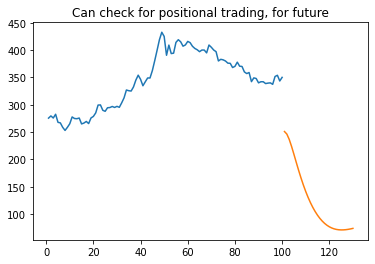

In [19]:
if pos>neg:
    day_new=np.arange(1,101)
    day_pred=np.arange(101,131)
    plt.title('Can check for positional trading, for future')
    plt.plot(day_new,scaler.inverse_transform(df[len(df)-100:]))
    plt.plot(day_pred,scaler.inverse_transform(lst_output))
elif pos>2*(neg):
    print("Can proceed with intraday")